In [36]:
# Balancing dataset using SMOTETomek method, which combines over- and under-sampling
# Then applied Logistic Regression, Naive Bayes Classifier, and Decision Tree algorithms
# Compared changes in accuracy rates when 10-fold cross-validation applied

In [37]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [38]:
from google.colab import files
uploaded = files.upload()

Saving stroke preprocessed.arff to stroke preprocessed (1).arff


In [39]:
import pandas as pd
from scipy.io import arff
import numpy as np

In [40]:
# Timing how long predictors take to run for efficiency calculations
# Import libraries
import time

In [41]:
data_file = "stroke preprocessed.arff"
data = arff.loadarff(data_file)

In [42]:
df = pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype == 'object':
    # Ensure data isn't read as bytes but rather as strings from file
    df[col] = df[col].str.decode('utf-8')
# Examine data types
print(df.dtypes)

"id"                   float64
"gender"                object
"age"                  float64
"hypertension"          object
"heart_disease"         object
"ever_married"          object
"work_type"             object
"residence_type"        object
"avg_glucose_level"    float64
"bmi"                  float64
"smoking_status"        object
"stroke"                object
dtype: object


In [43]:
# Display first 10 rows
df.head(10)

,"""id""","""gender""","""age""","""hypertension""","""heart_disease""","""ever_married""","""work_type""","""residence_type""","""avg_glucose_level""","""bmi""","""smoking_status""","""stroke"""
0,9046.0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676.0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,5000.0,never smoked,1
2,31112.0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182.0,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665.0,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669.0,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882.0,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434.0,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419.0,Female,59.0,0,0,Yes,Private,Rural,76.15,5000.0,Unknown,1
9,60491.0,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [44]:
# Examine meta info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   "id"                 5110 non-null   float64
 1   "gender"             5110 non-null   object 
 2   "age"                5110 non-null   float64
 3   "hypertension"       5110 non-null   object 
 4   "heart_disease"      5110 non-null   object 
 5   "ever_married"       5110 non-null   object 
 6   "work_type"          5110 non-null   object 
 7   "residence_type"     5110 non-null   object 
 8   "avg_glucose_level"  5110 non-null   float64
 9   "bmi"                5110 non-null   float64
 10  "smoking_status"     5110 non-null   object 
 11  "stroke"             5110 non-null   object 
dtypes: float64(4), object(8)
memory usage: 479.2+ KB


In [45]:
# The original 201 null values were all from bmi column, and they have been replaced by placeholder value 5000
# Convert the 5000 values back into null values
df = df.replace(5000.0, np.nan)

In [46]:
# Check head of dataset again
df.head(10)

,"""id""","""gender""","""age""","""hypertension""","""heart_disease""","""ever_married""","""work_type""","""residence_type""","""avg_glucose_level""","""bmi""","""smoking_status""","""stroke"""
0,9046.0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676.0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112.0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182.0,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665.0,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669.0,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882.0,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434.0,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419.0,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491.0,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [47]:
# Check structure of data types to ensure bmi remains float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   "id"                 5110 non-null   float64
 1   "gender"             5110 non-null   object 
 2   "age"                5110 non-null   float64
 3   "hypertension"       5110 non-null   object 
 4   "heart_disease"      5110 non-null   object 
 5   "ever_married"       5110 non-null   object 
 6   "work_type"          5110 non-null   object 
 7   "residence_type"     5110 non-null   object 
 8   "avg_glucose_level"  5110 non-null   float64
 9   "bmi"                4909 non-null   float64
 10  "smoking_status"     5110 non-null   object 
 11  "stroke"             5110 non-null   object 
dtypes: float64(4), object(8)
memory usage: 479.2+ KB


In [48]:
# Remove records with NAs from dataset
df_noNA = df
df_noNA = df_noNA.dropna()
df_noNA.head(10)

,"""id""","""gender""","""age""","""hypertension""","""heart_disease""","""ever_married""","""work_type""","""residence_type""","""avg_glucose_level""","""bmi""","""smoking_status""","""stroke"""
0,9046.0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112.0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182.0,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665.0,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669.0,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882.0,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434.0,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491.0,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109.0,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095.0,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [49]:
# See if data is imbalanced on the variable of interest, stroke
# Count how many '1's (stroke) and '0's (no stroke) appear
print(df_noNA['"stroke"'].value_counts())
# Dataset is quite unbalanced on the stroke variable
# Around 209/(4700+209) = 4.3% of dataset is positive for stroke

0    4700
1     209
Name: "stroke", dtype: int64


In [50]:
# Change 'stroke' attribute into data type float
df_noNA['"stroke"'] = df_noNA['"stroke"'].astype(float)
df_noNA.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"""id""","""gender""","""age""","""hypertension""","""heart_disease""","""ever_married""","""work_type""","""residence_type""","""avg_glucose_level""","""bmi""","""smoking_status""","""stroke"""
0,9046.0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
2,31112.0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,60182.0,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,1665.0,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
5,56669.0,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
6,53882.0,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1.0
7,10434.0,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1.0
9,60491.0,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1.0
10,12109.0,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1.0
11,12095.0,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1.0


In [51]:
print(df_noNA.dtypes)

"id"                   float64
"gender"                object
"age"                  float64
"hypertension"          object
"heart_disease"         object
"ever_married"          object
"work_type"             object
"residence_type"        object
"avg_glucose_level"    float64
"bmi"                  float64
"smoking_status"        object
"stroke"               float64
dtype: object


In [52]:
 # See if there are any extreme values in numeric data
 df_noNA.describe()

,"""id""","""age""","""avg_glucose_level""","""bmi""","""stroke"""
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,105.305150,28.893237,0.042575
std,20995.098457,22.555115,44.424341,7.854067,0.201917
min,77.000000,0.080000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,271.740000,97.600000,1.000000


In [53]:
# Normalize continuous numeric variables
# Such as age, avg_glucose_level, and bmi
# Using z-score methods

# Import libraries for normalization
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

# Only need to normalize continuous numeric variables
var_to_norm = ['"age"', '"avg_glucose_level"', '"bmi"']
df_noNA[var_to_norm] = scaler.fit_transform(df_noNA[var_to_norm])

# Examine first 10 rows of normalized dataset
df_noNA.head()

# The 3 columns are now standarized to values between 0-1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,"""id""","""gender""","""age""","""hypertension""","""heart_disease""","""ever_married""","""work_type""","""residence_type""","""avg_glucose_level""","""bmi""","""smoking_status""","""stroke"""
0,9046.0,Male,0.816895,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1.0
2,31112.0,Male,0.975586,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1.0
3,60182.0,Female,0.597168,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1.0
4,1665.0,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1.0
5,56669.0,Male,0.987793,0,0,Yes,Private,Urban,0.605161,0.214204,formerly smoked,1.0


In [54]:
# Create list of categorical columns
cat_cols = ['"gender"', '"hypertension"', '"heart_disease"', '"ever_married"', '"work_type"', '"residence_type"', '"smoking_status"']

In [55]:
# Create copy of a data frame in memory w/ a different name
df_dummy = df_noNA.copy()
# Convert only categorical feature into dummy/one-hot features
df_dummy = pd.get_dummies(df_noNA, columns = cat_cols, prefix = cat_cols)
# Print dataset
df_dummy

,"""id""","""age""","""avg_glucose_level""","""bmi""","""stroke""","""gender""_Female","""gender""_Male","""gender""_Other","""hypertension""_0","""hypertension""_1",...,"""work_type""_Never_worked","""work_type""_Private","""work_type""_Self-employed","""work_type""_children","""residence_type""_Rural","""residence_type""_Urban","""smoking_status""_Unknown","""smoking_status""_formerly smoked","""smoking_status""_never smoked","""smoking_status""_smokes"
0,9046.0,0.816895,0.801265,0.301260,1.0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112.0,0.975586,0.234512,0.254296,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182.0,0.597168,0.536008,0.276060,1.0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665.0,0.963379,0.549349,0.156930,1.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,56669.0,0.987793,0.605161,0.214204,1.0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180.0,0.157715,0.221402,0.095074,0.0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
5106,44873.0,0.987793,0.323516,0.340206,0.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723.0,0.426270,0.128658,0.232532,0.0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544.0,0.621582,0.513203,0.175258,0.0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [56]:
# Create train test set split
from sklearn.model_selection import train_test_split

In [57]:
# Balancing Dataset: Import libraries needed for SMOTETomek method which
# Will use a combination of over- and under-sampling methods
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [58]:
print(df_dummy.dtypes)

"id"                                float64
"age"                               float64
"avg_glucose_level"                 float64
"bmi"                               float64
"stroke"                            float64
"gender"_Female                       uint8
"gender"_Male                         uint8
"gender"_Other                        uint8
"hypertension"_0                      uint8
"hypertension"_1                      uint8
"heart_disease"_0                     uint8
"heart_disease"_1                     uint8
"ever_married"_No                     uint8
"ever_married"_Yes                    uint8
"work_type"_Govt_job                  uint8
"work_type"_Never_worked              uint8
"work_type"_Private                   uint8
"work_type"_Self-employed             uint8
"work_type"_children                  uint8
"residence_type"_Rural                uint8
"residence_type"_Urban                uint8
"smoking_status"_Unknown              uint8
"smoking_status"_formerly smoked

In [59]:
# Partition the class of interest, stroke (Dependent Variable), from the Independent Variables
iv_classes = df_dummy.iloc[:,:-1]
dv_class = df_dummy.iloc[:,-1]

In [60]:
# Set class name as "stroke", all other attributes will be used as features
class_col_name = '"stroke"'
# Obtain necessary dummy feature names
dummy_feature_name = df_dummy.columns.values.tolist()
dummy_feature_names = dummy_feature_name[5:]

In [61]:
# 70% training, 30% test set split
x_train, x_test, y_train, y_test = train_test_split(df_dummy.loc[:, dummy_feature_names], df_dummy[class_col_name], test_size=0.3, random_state=1)

In [62]:
# Display the class distribution in its original split
print("Original class split prior to SMOTEtomek sampling: ", Counter(y_train))

Original class split prior to SMOTEtomek sampling:  Counter({0.0: 3291, 1.0: 145})


In [63]:
# Identify and store the independent variables in the dataset in 'features'
features = df_dummy.drop(columns=['"stroke"']).columns

In [64]:
# Begin to implement the SMOTETomek method
SMOTETomek_method = SMOTETomek(random_state=1)

In [65]:
# Apply dataset onto SMOTETomek algorithm
x_STsampled, y_STsampled = SMOTETomek_method.fit_resample(df_dummy[dummy_feature_names], df_dummy['"stroke"'])

In [66]:
# Display the class distribution after the SMOTE Tomek algorithm is applied
print("Class split after SMOTETomek method applied: ",Counter(y_STsampled))

Class split after SMOTETomek method applied:  Counter({1.0: 4699, 0.0: 4699})


In [67]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

In [68]:
start = time.time()

In [69]:
# Import needed libraries for Logistic Regression Model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)

In [70]:
# Evaluate the SMOTE Oversampler
clf.fit(x_STsampled, y_STsampled)
y_pred = clf.predict_proba(df_dummy[dummy_feature_names])[:, 1]

In [71]:
# Display ROC AUC score
print("SMOTEtomek over- and undersampled data - ROC AUC: ", roc_auc_score(df_dummy['"stroke"'], y_pred))

SMOTEtomek over- and undersampled data - ROC AUC:  0.6859874783670977


In [72]:
# Begin to Implement Logistic Regression Model
log_regr = LogisticRegression()

# Apply data into Logistic Regression Model
log_regr.fit(x_train, y_train)
y_pred = log_regr.predict(x_test)

In [73]:
# Obtain Confusion Matrix and Evaluation Metrics for the Logistic Regression Model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1409,    0],
       [  64,    0]])

In [74]:
# Display Evaluation Metrics for Logistic Regression Model
print("Logistic Regression Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression Precision:\t",metrics.precision_score(y_test, y_pred))
print("Logistic Regression Recall:\t",metrics.recall_score(y_test, y_pred))

Logistic Regression Accuracy:	 0.956551255940258
Logistic Regression Precision:	 0.0
Logistic Regression Recall:	 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# Import libraries for cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict

# 10-Fold Cross Validation for Logistic Regression
cv_lr = cross_val_score(log_regr, df_dummy, df_dummy[class_col_name], cv=10)
print("Cross-validated scores:\t", cv_lr)

# Increased Accuracy score from  0.956 to 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-validated scores:	 [1.         1.         1.         1.         1.         1.
 1.         1.         0.95723014 0.95918367]


In [76]:
# Cross validation accuracy for Logistic Regression (R2 score)
predictions = cross_val_predict(log_regr, df_dummy, df_dummy[class_col_name], cv=10)
accuracy = metrics.r2_score(df_dummy[class_col_name], predictions)
print("Cross-Predicted Accuracy for Logistic Regression: ", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-Predicted Accuracy for Logistic Regression:  0.7951043469408531


In [77]:
end = time.time()

print("Time to run Logistic Regression: ", end - start)

Time to run Logistic Regression:  3.0175721645355225


In [78]:
start = time.time()

# Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

In [79]:
# Create Multinomial NB Classifier
nb = MultinomialNB()

In [80]:
# Train model using training sets
nb.fit(x_STsampled, y_STsampled)

MultinomialNB()

In [81]:
# Predict response for test dataset
y_pred = nb.predict(x_test)

In [82]:
# Print Naive Bayes output
print("Number of features used: ", nb.n_features_)
print("Classes: ", nb.classes_)
print("Number of records for classes: ", nb.class_count_)
print("Log prior probability for classes: ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class: ", nb.feature_log_prob_)

Number of features used:  20
Classes:  [0. 1.]
Number of records for classes:  [4699. 4699.]
Log prior probability for classes:  [-0.69314718 -0.69314718]
Log conditional probability for each feature given a class:  [[ -2.47213647  -2.84050141  -9.70847581  -2.03292981  -4.43291544
   -1.99023486  -5.08841702  -2.97388415  -2.38894207  -3.9997058
   -7.26612878  -2.5065595   -3.81821377  -3.89285386  -2.65273166
   -2.62592725  -3.11886182  -3.74232908  -2.9234533   -3.85197225]
 [ -3.36673931  -2.59550465 -12.96159351  -3.11987498  -2.52132023
   -3.46277138  -2.50917562  -2.53266762  -4.22189697  -2.462737
  -12.96159351  -3.33676221  -2.74176354  -5.01497594  -2.99574167
   -3.04415374  -2.56869806  -2.66488213  -3.21622282  -2.48003298]]


In [83]:
# Get Naive Bayes Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cf)
tn, fp, fn, tp = cf.ravel()
print("TP: ", tp, ", FP: ", fp, ", TN: ", tn, ", FN: ", fn)

Confusion Matrix
[[1346   63]
 [  55    9]]
TP:  9 , FP:  63 , TN:  1346 , FN:  55


In [84]:
# Get Naive Bayes Classifier Classifier report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1409
         1.0       0.12      0.14      0.13        64

    accuracy                           0.92      1473
   macro avg       0.54      0.55      0.55      1473
weighted avg       0.92      0.92      0.92      1473



In [85]:
# Display Evaluation Metrics for Naive Bayes Classifier
print("Naive Bayes Classifier Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
print("Naive Bayes Classifier Precision:\t",metrics.precision_score(y_test, y_pred))
print("Naive Bayes Classifier Recall:\t\t",metrics.recall_score(y_test, y_pred))

Naive Bayes Classifier Accuracy:	 0.9198913781398507
Naive Bayes Classifier Precision:	 0.125
Naive Bayes Classifier Recall:		 0.140625


In [86]:
# 10-Fold Cross Validation for Naive Bayes Classifier
cv_nb = cross_val_score(nb, df_dummy, df_dummy[class_col_name], cv=10)
print("Cross-validated scores:\t", cv_nb)

# Increased Accuracy score from 0.920 to 0.998

Cross-validated scores:	 [0.99796334 0.99592668 0.99796334 0.99796334 0.99592668 0.99389002
 0.99592668 0.99796334 0.99796334 0.99795918]


In [87]:
# Cross validation accuracy for Naive Bayes Classifier (R2 score)
predictions = cross_val_predict(nb, df_dummy, df_dummy[class_col_name], cv=10)
accuracy = metrics.r2_score(df_dummy[class_col_name], predictions)
print("Cross-Predicted Accuracy for Naive Bayes Classifier: ", accuracy)

Cross-Predicted Accuracy for Naive Bayes Classifier:  0.9250381757100682


In [88]:
end = time.time()

print("Time to run Naive Bayes Classifier: ", end - start)

Time to run Naive Bayes Classifier:  0.40878915786743164


In [89]:
start = time.time()

# Decision tree on dummy encoded data
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5) # 5 levels set
clf = clf.fit(x_STsampled, y_STsampled)

import graphviz
# Obtain unique class values to show on tree
class_values = df_dummy[class_col_name]. unique()
print("class names: ", class_values)

class names:  [1. 0.]


In [90]:
# Import libraries for plotting the decision tree
import matplotlib
from matplotlib import pyplot as plt

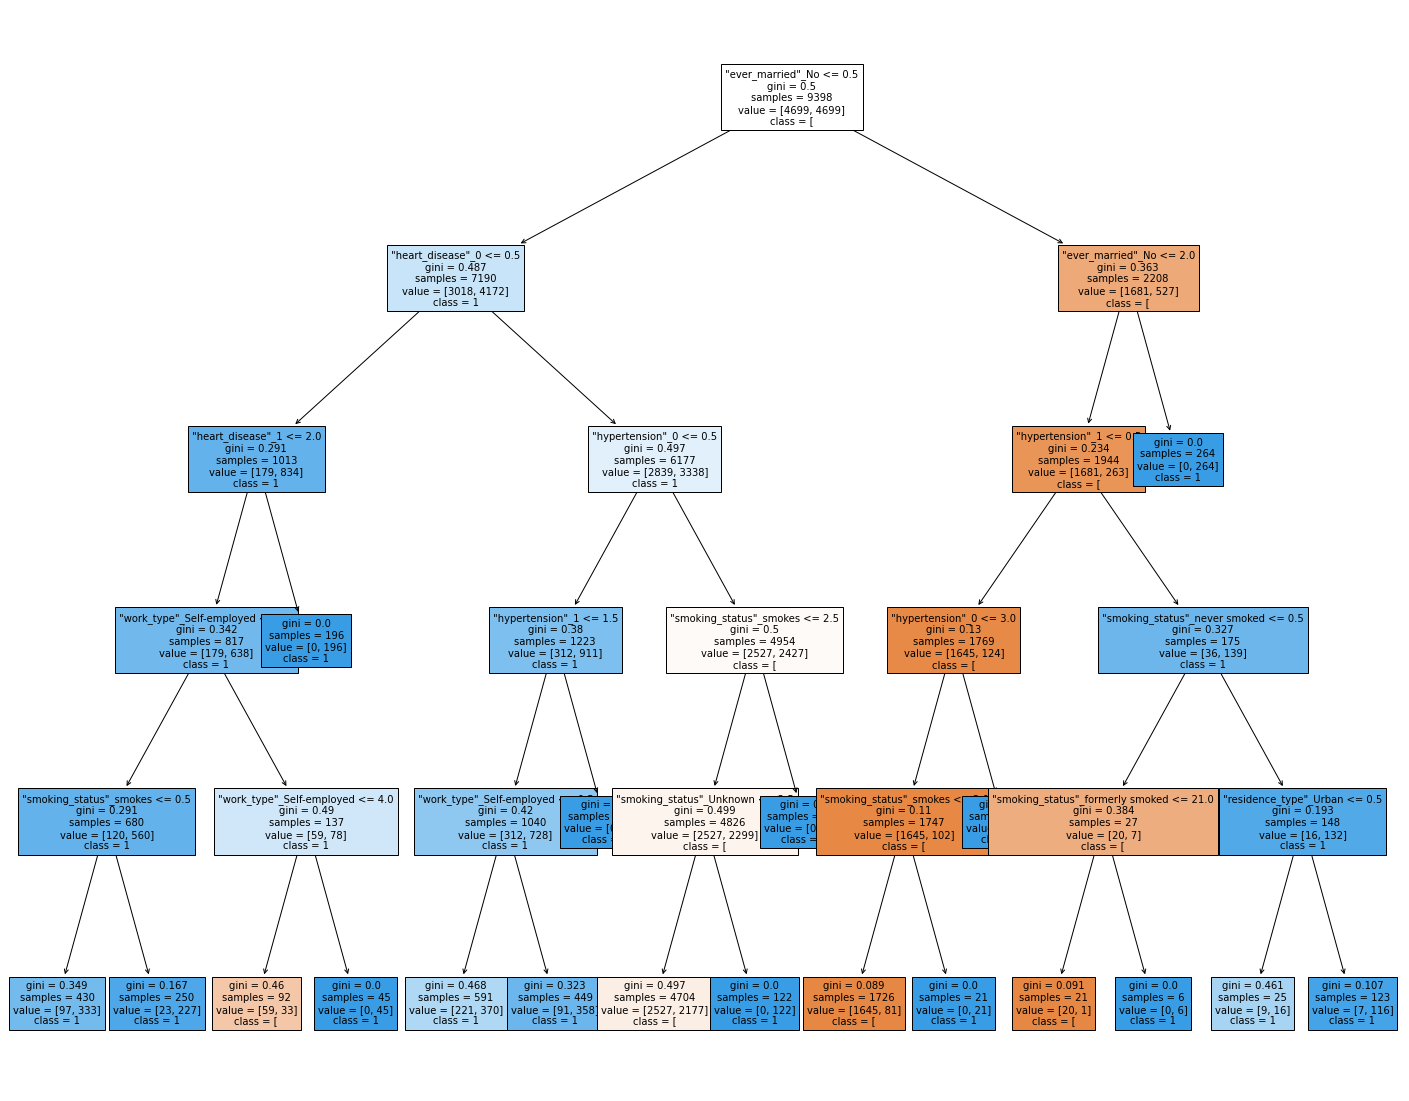

In [91]:
# Plot decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = dummy_feature_names, class_names = str(class_values), filled = True, fontsize = 10)

In [92]:
# Save decision tree figure
fig.savefig("decision_tree9.png")

In [93]:
# Perform prediction on test set
y_pred = clf.predict(x_test)

In [94]:
# Get decision tree confusion matrix
cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cf)
tn, fp, fn, tp = cf.ravel()
print("TP: ", tp, ", FP: ", fp, ", TN: ", tn, ", FN: ", fn)

Confusion Matrix
[[1282  127]
 [  35   29]]
TP:  29 , FP:  127 , TN:  1282 , FN:  35


In [95]:
# Get decision tree report
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred))

# Overfitting issue seems to have resolved when doing a combo of over- and under-fitting

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      1409
         1.0       0.19      0.45      0.26        64

    accuracy                           0.89      1473
   macro avg       0.58      0.68      0.60      1473
weighted avg       0.94      0.89      0.91      1473



In [96]:
# Display Evaluation Metrics for Decision Tree
print("Decision Tree Accuracy:\t\t", metrics.accuracy_score(y_test, y_pred))
print("Decision Tree Precision:\t",metrics.precision_score(y_test, y_pred))
print("Decision Tree Recall:\t\t",metrics.recall_score(y_test, y_pred))

Decision Tree Accuracy:		 0.890020366598778
Decision Tree Precision:	 0.1858974358974359
Decision Tree Recall:		 0.453125


In [97]:
# 10-Fold Cross Validation for Decision Tree
cv_dt = cross_val_score(clf, df_dummy, df_dummy[class_col_name], cv=10)
print("Cross-validated scores:\t", cv_dt)

# Increased Accuracy score from 0.890 to 1

Cross-validated scores:	 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [98]:
# Cross validation accuracy for Decision Tree (R2 score)
predictions = cross_val_predict(clf, df_dummy, df_dummy[class_col_name], cv=10)
accuracy = metrics.r2_score(df_dummy[class_col_name], predictions)
print("Cross-Predicted Accuracy for Decision Tree: ", accuracy)

Cross-Predicted Accuracy for Decision Tree:  1.0


In [99]:
end = time.time()

print("Time to run Decision Tree: ", end - start)

Time to run Decision Tree:  3.424363613128662
